<a href="https://colab.research.google.com/github/Anitagg1/Phyton-Workshop/blob/main/Email_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [497]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [498]:
df = pd.read_csv('/content/sales.csv')

In [499]:
df = df.drop([45])


In [500]:
df = df.drop([649])

In [501]:
df = df.drop_duplicates(keep='first')

In [502]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

In [503]:
df['total'] = df['Quantity'] * df['UnitPrice']

In [504]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, errors='coerce')

In [505]:
df['day_of_week'] = df['InvoiceDate'].dt.day_name()

In [506]:
df['month'] = df['InvoiceDate'].dt.month_name()

In [507]:
df['hour'] = df['InvoiceDate'].dt.hour

In [508]:

df['Date'] = df['InvoiceDate'].dt.strftime('%d/%m/%Y')
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M')

In [ ]:
df

In [429]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
total                 float64
day_of_week            object
month                  object
hour                  float64
Date                   object
Time                   object
dtype: object

In [ ]:
##############################

In [524]:
df1 = df.groupby(by = ['CustomerID', 'Country']).sum()['Quantity'].nlargest(100).reset_index()
df1.columns = ['customer','country', 'total']

In [525]:
df1.to_csv('max_orders.csv')

In [519]:
df1

,customer,country,total
0,14646.0,Netherlands,278466.02
1,18102.0,DE,256438.49
2,17450.0,DE,188260.57
3,14911.0,Ireland,132458.73
4,12415.0,Australia,123638.18
5,14156.0,Ireland,113214.59
6,17511.0,DE,88127.55
7,16684.0,DE,65892.08
8,13694.0,DE,62690.54
9,15311.0,DE,59284.19


In [480]:
df1.dtypes

customer     object
country      object
total       float64
dtype: object

Text(0, 0.5, 'Total Orders')

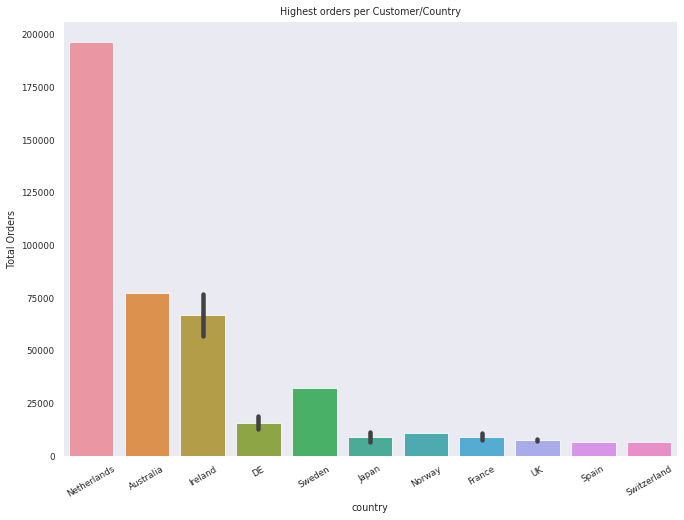

In [526]:
ax = sns.barplot(x="country", y="total", data=df1)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Highest orders per Customer/Country")

plt.ylabel("Total Orders")

In [527]:
not_country = ['DE']


df2 = df1.loc[df1['country'].apply(lambda x: x not in not_country)]
print(f'AFTER: \n {df2}')

AFTER: 
    customer      country     total
0   14646.0  Netherlands  196651.0
1   12415.0    Australia   77242.0
2   14911.0      Ireland   77155.0
8   14156.0      Ireland   56908.0
13  17404.0       Sweden   32321.0
38  12753.0        Japan   11250.0
39  12433.0       Norway   11071.0
40  12678.0       France   10877.0
57  12731.0       France    8359.0
60  12471.0           UK    7847.0
64  12681.0       France    7442.0
67  12621.0           UK    7333.0
76  12540.0        Spain    6612.0
80  12754.0        Japan    6479.0
81  12451.0  Switzerland    6454.0


Text(0, 0.5, 'Total Orders')

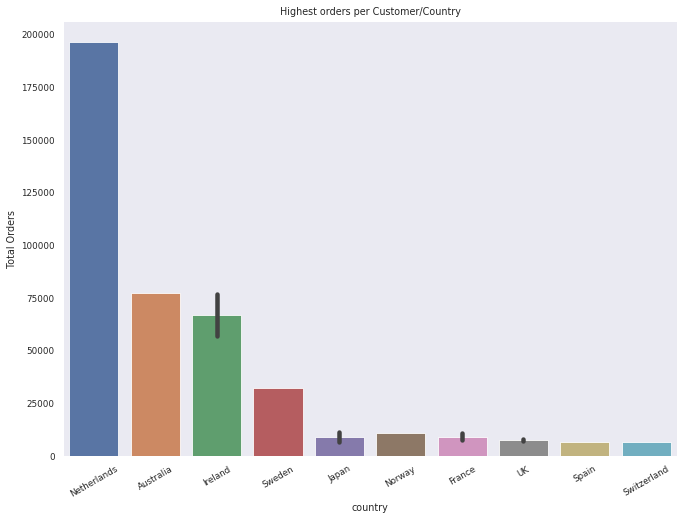

In [528]:
ax = sns.barplot(x="country", y="total", data=df2)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Highest orders per Customer/Country")

plt.ylabel("Total Orders")

In [ ]:
ax = sns.pointplot(data = df1[['country','total','customer']], x = 'country', y = 'total',
              scale = 0.2, hue = 'customer');

In [ ]:
order = df.groupby(['StockCode', 'Description'])['total'].sum().nlargest(5)
order

Text(0, 0.5, 'Total Sales')

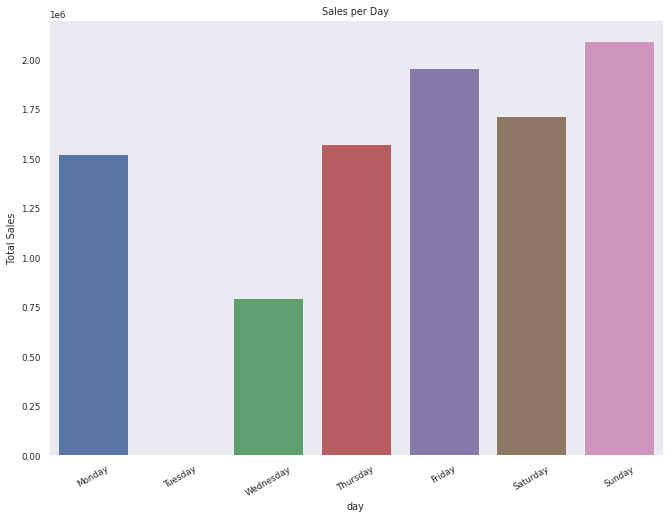

In [402]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

ax = sns.barplot(x="day", y="total", data=df1, order= day_order)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Sales per Day")

plt.ylabel("Total Sales")

In [403]:
df3 = df.groupby(by = ['CustomerID']).sum()['total'].reset_index()
df3.columns = ['customer', 'total']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   customer  4373 non-null   object 
 1   total     4373 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.5+ KB


In [404]:
df3.to_csv('customers.csv')

In [406]:
df4 = df.groupby(by = ['CustomerID']).sum()['Quantity'].reset_index()
df4.columns = ['customer', 'orders']
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   customer  4373 non-null   object 
 1   orders    4373 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.5+ KB


In [407]:
df4.to_csv('orders.csv')

In [398]:
df2 = df.groupby(by = ['month']).sum()['total'].reset_index()
df2.columns = ['month', 'total']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     object 
 1   total   12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


Text(0, 0.5, 'Total Sales in USD')

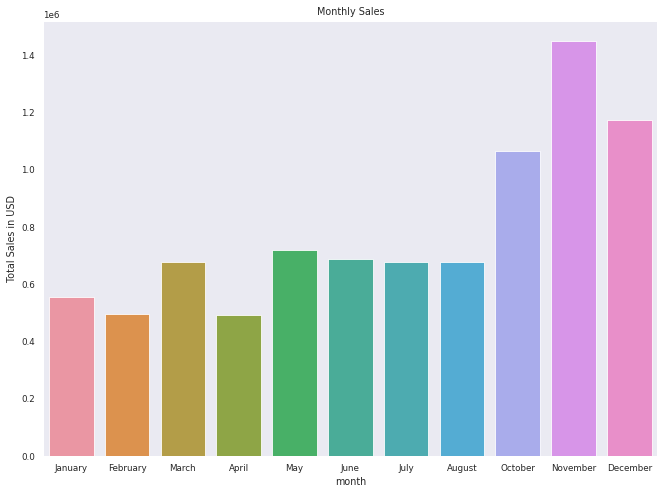

In [391]:
month_order = ["January", "February", "March", "April", "May", "June", "July",  "August",  "October", "November" , "December"]

ax = sns.barplot(x="month", y="total", data=df2, order= month_order)

plt.title("Monthly Sales")

plt.ylabel("Total Sales in USD")

In [399]:
df2.to_csv('last_week.csv')

In [314]:
df3

,customer,quantity,total
0,12346.0,-74215.0,1
1,12346.0,74215.0,1
2,12347.0,2.0,2
3,12347.0,3.0,4
4,12347.0,4.0,32
...,...,...,...
46832,18287.0,24.0,18
46833,18287.0,30.0,2
46834,18287.0,36.0,7
46835,18287.0,48.0,9


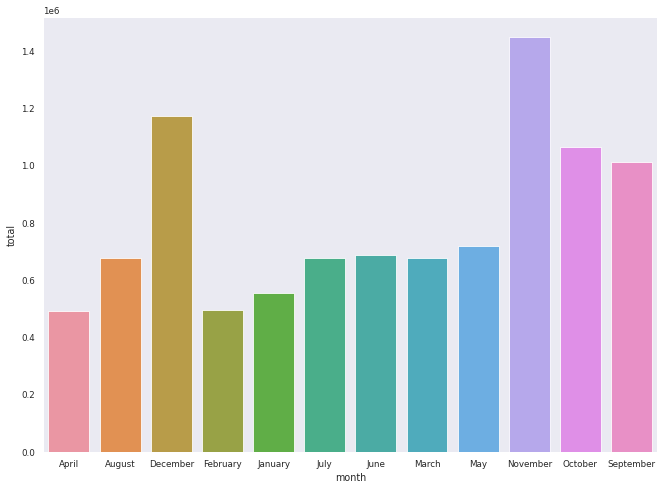

In [388]:
sns.barplot(x='month', y='total', data=df2)

Text(0, 0.5, 'Total Purchases in USD')

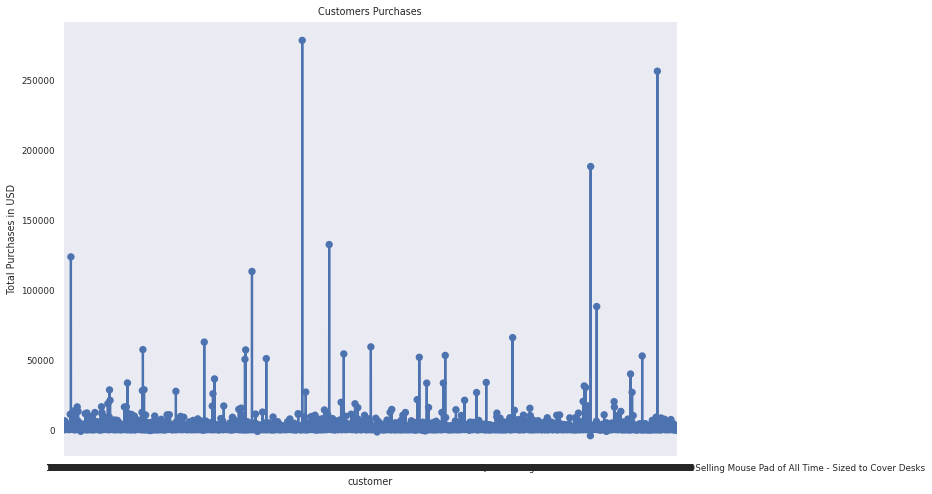

In [413]:
ax = sns.pointplot(data = df3[['customer','total']], x = 'customer', y = 'total',
              scale = 0.5)
plt.title("Customers Purchases")

plt.ylabel("Total Purchases in USD")

Text(0, 0.5, 'Total of Orders')

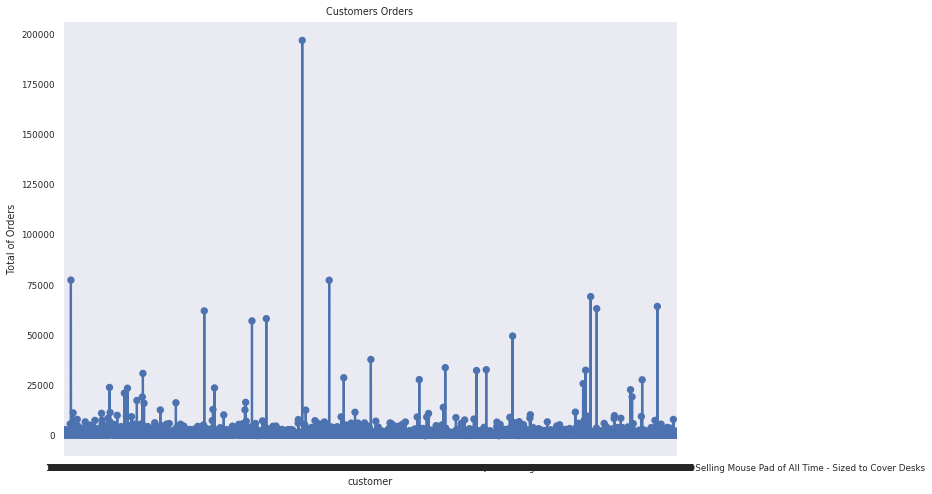

In [414]:
ax = sns.pointplot(data = df4[['customer','orders']], x = 'customer', y = 'orders',
              scale = 0.5)
plt.title("Customers Orders")

plt.ylabel("Total of Orders")

In [355]:
Total = df['total'].sum()
Total

9659772.834

Text(0, 0.5, 'Total - Million USD')

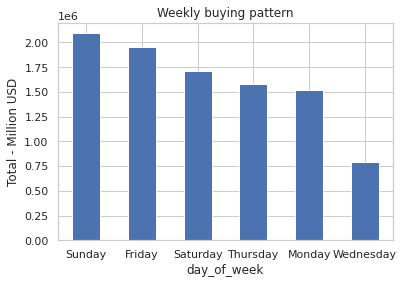

In [102]:
second.plot.bar(rot=0)
plt.title("Weekly buying pattern")
plt.ylabel("Total - Million USD")

In [377]:
monday3

month
April         489111.461
August        676251.460
December     1172310.400
February      493984.470
January       553466.680
July          675027.731
June          685052.450
March         676877.970
May           717182.920
November     1446640.470
October      1061831.450
September    1012035.372
Name: total, dtype: float64

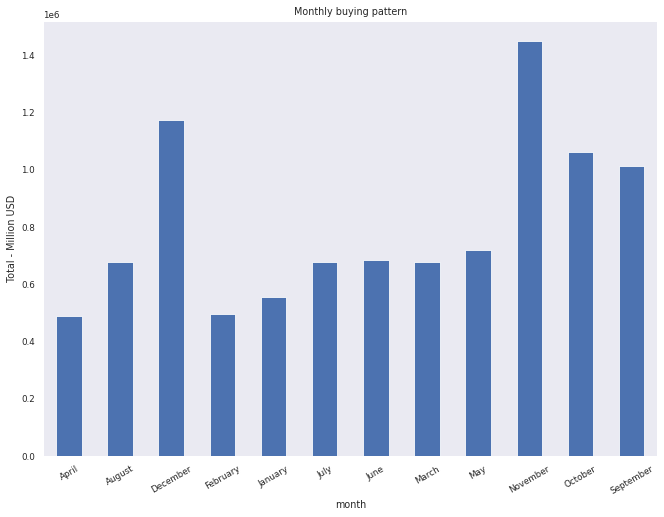

In [347]:

monday3.plot.bar(rot=0)
plt.title("Monthly buying pattern")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("Total - Million USD")

plt.show()

In [8]:
first = df.groupby(['StockCode', 'Description'])['total'].sum().nlargest(5)
first

StockCode  Description                                                                                                                                                             
DOT        1MORE Triple Driver In-Ear Earphones Hi-Res Headphones with High Resolution, Bass Driven Sound, MEMS Mic, In-Line Remote, High Fidelity for Smartphones/PC/Tablet - Gold    206245.48
22423      Samsung Galaxy S10+ Plus 128GB+8GB RAM SM-G975F/DS Dual Sim 6.4" LTE Factory Unlocked Smartphone International Model, No Warranty (Prism Black)                             164459.49
47566      ASUS ROG Swift PG248Q 24” Gaming Monitor Full HD 1080p 1ms 180Hz DP HDMI Eye Care G-SYNC eSports                                                                             98243.88
85123A     Apple iPhone X, 256GB, Silver - Fully Unlocked (Renewed)                                                                                                                     97659.94
85099B     Samsung Galaxy S9 G960U 64GB Unlocked

In [163]:
from matplotlib import pyplot as plt


Text(0, 0.5, 'Total - USD')

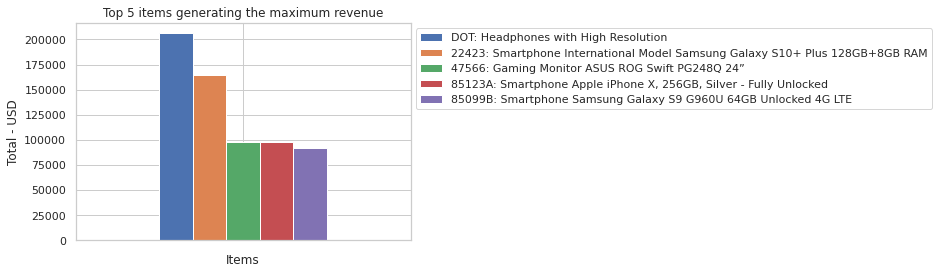

In [57]:
first1 = pd.DataFrame({'DOT: Headphones with High Resolution':206245.48, '22423: Smartphone International Model Samsung Galaxy S10+ Plus 128GB+8GB RAM':164459.49, '47566: Gaming Monitor ASUS ROG Swift PG248Q 24”':98243.88, '85123A: Smartphone Apple iPhone X, 256GB, Silver - Fully Unlocked':97659.94, '85099B: Smartphone Samsung Galaxy S9 G960U 64GB Unlocked 4G LTE':92175.79}, index=[''])
first1.plot(kind='bar').legend(bbox_to_anchor=(1,1))
plt.title("Top 5 items generating the maximum revenue")
plt.xlabel("Items")
plt.ylabel("Total - USD")

In [20]:

#first['total'] = pd.to_numeric(first['total'], errors='coerce')
#first['StockCode'] = first.index
#first['Description'] = first.index
#first['total'] = first.index
#first['Description'] = first.Description.astype(str)

In [ ]:

import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = df2[['month','total','day']], x = 'month', y = 'total',
              scale = 0.2, hue = 'day');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise daily distribution of bike rentals',ylabel= 'total_count');

In [ ]:
ax = sns.barplot(x="StockCode", y="total", data=first)

In [ ]:
first.plot.bar()

In [ ]:
'df[df == '649']

In [ ]:
#print(df[df['StockCode']== '85123A'].index.values)

[     0     49     66 ... 540217 540837 541639]


In [ ]:
#df.loc[df['StockCode'] == 'DOT']

In [ ]:
#new4 = df[df['StockCode'] == 'M']
#Total = new4['total'].sum()
#print (Total)

In [ ]:
#Total = newdf['total'].sum()
#print (Total)

97838.45


In [ ]:
#df['StockCode'].value_counts(ascending=False).head(10)

In [ ]:
#df['Quantity'].value_counts().sort_index(ascending=False).head(5)

In [ ]:
#df = df.astype({'Quantity': int, 'UnitPrice': complex})

In [ ]:
#df['Quantity'] = pd.to_numeric(df['Quantity'](df, errors='coerce'))


In [ ]:
#df['Quantity'] = df['Quantity'].astype(str).astype(int)
#print(df.dtypes)

In [ ]:
#df['UnitPrice'].astype(str).astype(float)
#print(df.dtypes)

In [ ]:
#df['UnitPrice'] = df['UnitPrice'].astype(str).astype(float)
#print(df.dtypes)

In [ ]:
#df['Quantity'].astype(str).astype(int)

In [ ]:

#pd.to_numeric(df['Quantity'])